In [4]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
from mlxtend.feature_selection import ExhaustiveFeatureSelector, SequentialFeatureSelector
from sklearn.base import clone
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, f1_score, mean_absolute_error
from sklearn.metrics import silhouette_score, davies_bouldin_score, mean_squared_error, r2_score, roc_curve, auc
from sklearn.model_selection import train_test_split, RandomizedSearchCV, TunedThresholdClassifierCV, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
import plotly.express as px
import logging
from scipy import stats
from scipy.stats import randint, uniform
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, LabelEncoder, QuantileTransformer, Normalizer
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, VarianceThreshold , RFECV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline  
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 4000

# Set a consistent style for plots
sns.set_theme(style="whitegrid")

In [13]:
# Read dataset
df = pd.read_csv("train.csv")

# Drop index column
df = df.drop(columns=['ID'])

# Check the dataset size
print (f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 2071 rows and 23 columns


In [14]:
df.head()

TARGET_LifeExpectancy  Country  Year  Status  AdultMortality  \
0                   67.1      146  2017       0           263.0   
1                   59.8      146  2016       0           271.0   
2                   57.6      146  2015       0           268.0   
3                   55.5      146  2014       0           272.0   
4                   57.7      146  2013       0           275.0   

   AdultMortality-Male  AdultMortality-Female  SLS  Alcohol  \
0                  262                    264   62     0.01   
1                  278                    264   64     0.01   
2                  246                    290   66     0.01   
3                  248                    296   69     0.01   
4                  278                    272   71     0.01   

   PercentageExpenditure  ...  Polio  TotalExpenditure  Diphtheria  HIV-AIDS  \
0              71.279624  ...    6.0              8.16        65.0       0.1   
1              73.523582  ...   58.0              8.18        62.0       0.1   
2              73.219243  ...   62.0              8.13        64.0       0.1   
3              78.184215  ...   67.0              8.52        67.0       0.1   
4               7.097109  ...   68.0              7.87        68.0       0.1   

      GDP  Population  Thinness1-19years  Thinness5-9years  \
0  654.37  33736494.0               17.2              17.3   
1  686.22    327582.0               17.5              17.5   
2  707.55  31731688.0               17.7              17.7   
3  750.35   3696958.0               17.9              18.0   
4   71.16   2978599.0               18.2              18.2   

   IncomeCompositionOfResources  Schooling  
0                         0.479   3.178050  
1                         0.476   3.162278  
2                         0.470   3.146427  
3                         0.463   3.130495  
4                         0.454   3.082207  

[5 rows x 23 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TARGET_LifeExpectancy         2071 non-null   float64
 1   Country                       2071 non-null   int64  
 2   Year                          2071 non-null   int64  
 3   Status                        2071 non-null   int64  
 4   AdultMortality                2070 non-null   float64
 5   AdultMortality-Male           2071 non-null   int64  
 6   AdultMortality-Female         2071 non-null   int64  
 7   SLS                           2071 non-null   int64  
 8   Alcohol                       2067 non-null   float64
 9   PercentageExpenditure         2062 non-null   float64
 10  Measles                       2070 non-null   float64
 11  BMI                           2063 non-null   float64
 12  Under5LS                      2070 non-null   float64
 13  Pol

In [16]:
df.describe().T

count          mean           std      min  \
TARGET_LifeExpectancy         2071.0  6.927451e+01  9.482281e+00    37.30   
Country                       2071.0  9.536021e+01  5.486164e+01     0.00   
Year                          2071.0  2.009519e+03  4.614147e+00  2002.00   
Status                        2071.0  1.854177e-01  3.887299e-01     0.00   
AdultMortality                2070.0  1.628203e+02  1.188993e+02     1.00   
AdultMortality-Male           2071.0  1.619083e+02  1.194422e+02     0.00   
AdultMortality-Female         2071.0  1.637595e+02  1.188003e+02     2.00   
SLS                           2071.0  3.307967e+01  1.358329e+02     0.00   
Alcohol                       2067.0  4.693009e+00  4.205270e+00     0.01   
PercentageExpenditure         2062.0  7.644291e+02  2.083501e+03     0.00   
Measles                       2070.0  2.096541e+03  9.961872e+03     0.00   
BMI                           2063.0  3.757295e+01  1.994637e+01     1.00   
Under5LS                      2070.0  4.584928e+01  1.852922e+02     0.00   
Polio                         2070.0  8.272077e+01  2.319260e+01     3.00   
TotalExpenditure              2061.0  5.881827e+00  2.557347e+00     0.37   
Diphtheria                    2071.0  8.275326e+01  2.313097e+01     2.00   
HIV-AIDS                      2068.0  1.632544e+00  4.784991e+00     0.10   
GDP                           2062.0  7.304337e+03  1.517904e+04     1.88   
Population                    2063.0  1.205231e+07  6.403752e+07    34.00   
Thinness1-19years             2070.0  4.939034e+00  4.697848e+00     0.10   
Thinness5-9years              2070.0  4.977971e+00  4.786593e+00     0.10   
IncomeCompositionOfResources  2066.0  6.098659e-01  2.166098e-01     0.00   
Schooling                     2064.0  3.372332e+00  5.909750e-01     0.00   

                                        25%            50%           75%  \
TARGET_LifeExpectancy             63.000000      71.200000  7.600000e+01   
Country                           50.000000      94.000000  1.440000e+02   
Year                            2006.000000    2010.000000  2.014000e+03   
Status                             0.000000       0.000000  0.000000e+00   
AdultMortality                    74.000000     144.000000  2.280000e+02   
AdultMortality-Male               74.000000     142.000000  2.280000e+02   
AdultMortality-Female             74.000000     144.000000  2.300000e+02   
SLS                                0.000000       3.000000  2.200000e+01   
Alcohol                            0.615000       3.820000  7.840000e+00   
PercentageExpenditure              5.688828      68.943329  4.294341e+02   
Measles                            0.000000      19.000000  4.257500e+02   
BMI                               18.800000      42.100000  5.590000e+01   
Under5LS                           0.000000       4.000000  2.700000e+01   
Polio                             77.000000      93.000000  9.700000e+01   
TotalExpenditure                   4.180000       5.640000  7.430000e+00   
Diphtheria                        78.000000      93.000000  9.700000e+01   
HIV-AIDS                           0.100000       0.100000  8.000000e-01   
GDP                              413.730000    1390.315000  5.746287e+03   
Population                    127445.000000  647744.000000  5.364814e+06   
Thinness1-19years                  1.600000       3.200000  7.375000e+00   
Thinness5-9years                   1.500000       3.300000  7.400000e+00   
IncomeCompositionOfResources       0.463000       0.655500  7.700000e-01   
Schooling                          3.065942       3.449638  3.741657e+00   

                                       max  
TARGET_LifeExpectancy         9.270000e+01  
Country                       1.920000e+02  
Year                          2.017000e+03  
Status                        1.000000e+00  
AdultMortality                6.990000e+02  
AdultMortality-Male           7.040000e+02  
AdultMortality-Female         7.220000e+02

In [17]:
# Drop duplicate rows
df = df.drop_duplicates()

# Reset the index, dropping the old index
df = df.reset_index(drop=True)

# Check the dataset size
print (f"After removing duplicates, the dataset has {df.shape[0]} rows and {df.shape[1]} columns")

After removing duplicates, the dataset has 2071 rows and 23 columns


In [18]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    ## the two following line may seem complicated but its actually very simple. 
    total = df.isnull().sum().sort_values(ascending=False)[lambda x: x != 0]
    percenteage = round(total/df.shape[0]*100,2)
    return pd.concat([total,percenteage], axis=1, keys=['Total', 'Percentage'])

# Check dataset missing percentage
missing_percentage(df)

Total  Percentage
TotalExpenditure                 10        0.48
PercentageExpenditure             9        0.43
GDP                               9        0.43
BMI                               8        0.39
Population                        8        0.39
Schooling                         7        0.34
IncomeCompositionOfResources      5        0.24
Alcohol                           4        0.19
HIV-AIDS                          3        0.14
AdultMortality                    1        0.05
Measles                           1        0.05
Thinness5-9years                  1        0.05
Under5LS                          1        0.05
Polio                             1        0.05
Thinness1-19years                 1        0.05

# Explotary Data Analysis

In [19]:
# Function to create a scatter plot with a regression line
def customized_regplot(y, x, title):
    """
    This function creates a scatter plot with a regression line to visualize the relationship 
    between two variables.

    Parameters:
    - y: The target/dependent variable (plotted on the y-axis).
    - x: The predictor/independent variable (plotted on the x-axis).
    - title: The title of the plot.
    """
    
    # Sizing the plot and setting style
    style.use('fivethirtyeight')  # Use the 'fivethirtyeight' style for the plot
    plt.figure(figsize=(12, 8))  # Set the figure size to 12x8 inches

    # Plotting target variable with predictor variable
    sns.regplot(y=y, x=x)  # Create a scatter plot with a regression line using seaborn
    plt.title(title)  # Add the title to the plot

In [22]:
# Function to create a distribution plot (histogram) with bins based on unique counts
def customized_displot(x, title, color='skyblue', edgecolor='black', fontsize=14):
    """
    This function creates a visually appealing distribution plot (histogram) to visualize 
    the distribution of a single variable. The number of bins is set based on the unique counts of the variable.

    Parameters:
    - x: The variable whose distribution is to be plotted (plotted on the x-axis).
    - title: The title of the plot.
    - color: Color of the histogram bars (default: 'skyblue').
    - edgecolor: Color of the edges of the bars (default: 'black').
    - fontsize: Font size for the title and labels (default: 14).
    """
    
    # Set plot style and size
    style.use('fivethirtyeight')  # Use the 'fivethirtyeight' style for a clean and modern look
    plt.figure(figsize=(12, 8))  # Set the figure size to 12x8 inches

    # Calculate the number of unique values for bins
    unique_counts = len(x.unique())
    bins = unique_counts if unique_counts > 1 else 10  # Ensure at least 10 bins if unique counts are too low

    # Create histogram plot
    ax = sns.histplot(
        x=x,  # Data for the x-axis
        bins=bins,  # Number of bins based on unique counts
        kde=False,  # Disable Kernel Density Estimate (KDE) plot
        stat='count',  # Display the count of observations in each bin
        color=color,  # Set bar color
        edgecolor=edgecolor  # Set edge color for bars
    )

    # Add bar labels to the histogram
    for container in ax.containers:
        # Create labels for each bar (only display non-zero values)
        labels = [int(value) if value != 0 else '' for value in container.datavalues]
        # Add labels to the bars with padding
        ax.bar_label(container, labels=labels, padding=5, fontsize=10, color='black')

    # Add title and axis labels
    plt.title(title, fontsize=fontsize + 2, fontweight='bold', pad=20)  # Add the title with padding
    plt.xlabel(x.name if hasattr(x, 'name') else x, fontsize=fontsize, labelpad=10)  # Use the variable name as the x-axis label if available
    plt.ylabel('Count', fontsize=fontsize, labelpad=10)  # Set the y-axis label to 'Count'

    # Customize grid and layout
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better readability
    plt.tight_layout()  # Adjust layout for better spacing

    # Display the plot
    plt.show()

In [21]:
# Function to create a scatter plot with a regression line
def customized_regplot(y, x, title):
    """
    This function creates a scatter plot with a regression line to visualize the relationship 
    between two variables.

    Parameters:
    - y: The target/dependent variable (plotted on the y-axis).
    - x: The predictor/independent variable (plotted on the x-axis).
    - title: The title of the plot.
    """
    
    # Sizing the plot and setting style
    style.use('fivethirtyeight')  # Use the 'fivethirtyeight' style for the plot
    plt.figure(figsize=(12, 8))  # Set the figure size to 12 inches (width) by 8 inches (height)

    # Plotting target variable with predictor variable
    sns.regplot(y=y, x=x)  # Create a scatter plot with a regression line using seaborn
    plt.title(title)  # Add the title to the plot

In [20]:
# Function to create histogram, QQ plot, and box plot for a specific column
def plotting_3_chart(df, feature, plot_title="Feature Analysis"):
    """
    Creates a histogram, QQ plot, and box plot for a specified column in a DataFrame.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        feature (str): The column name for analysis.
        plot_title (str): The title of the entire plot.
    """

    # Set a style
    plt.style.use('fivethirtyeight')  # Use the 'fivethirtyeight' style for the plots

    # Create a customized chart and set the figure size
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))  # Create a figure with constrained layout
    fig.suptitle(plot_title, fontsize=16, fontweight='bold')  # Set the main plot title

    # Create a grid of 3 columns and 3 rows
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)  # Define a 3x3 grid for subplots

    # Customizing the histogram grid
    ax1 = fig.add_subplot(grid[0, :2])  # Add a subplot for the histogram (spanning first 2 columns of the first row)
    ax1.set_title('Distribution')  # Set the title for the histogram
    sns.histplot(df.loc[:, feature], stat='density', ax=ax1, kde=True)  # Plot the histogram with KDE (Kernel Density Estimate)

    # Customizing the QQ plot
    ax2 = fig.add_subplot(grid[1, :2])  # Add a subplot for the QQ plot (spanning first 2 columns of the second row)
    ax2.set_title('QQ Plot')  # Set the title for the QQ plot
    stats.probplot(df.loc[:, feature], plot=ax2)  # Plot the QQ plot to check for normality

    # Customizing the box plot
    ax3 = fig.add_subplot(grid[:, 2])  # Add a subplot for the box plot (spanning the entire third column)
    ax3.set_title('Box Plot')  # Set the title for the box plot
    sns.boxplot(y=df.loc[:, feature], ax=ax3)  # Plot the box plot to visualize the distribution and outliers

# Observation 1: Country

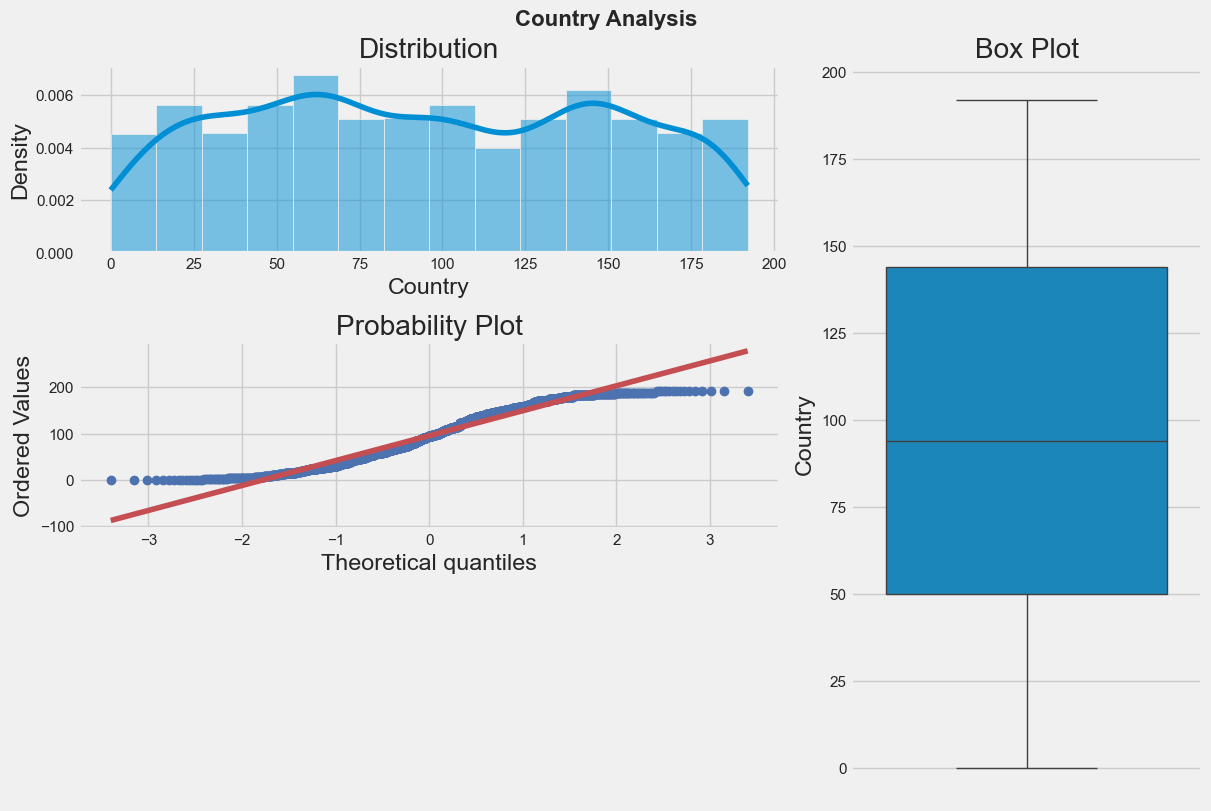

In [23]:
plotting_3_chart(df, 'Country', 'Country Analysis')

# Observation 2: Year

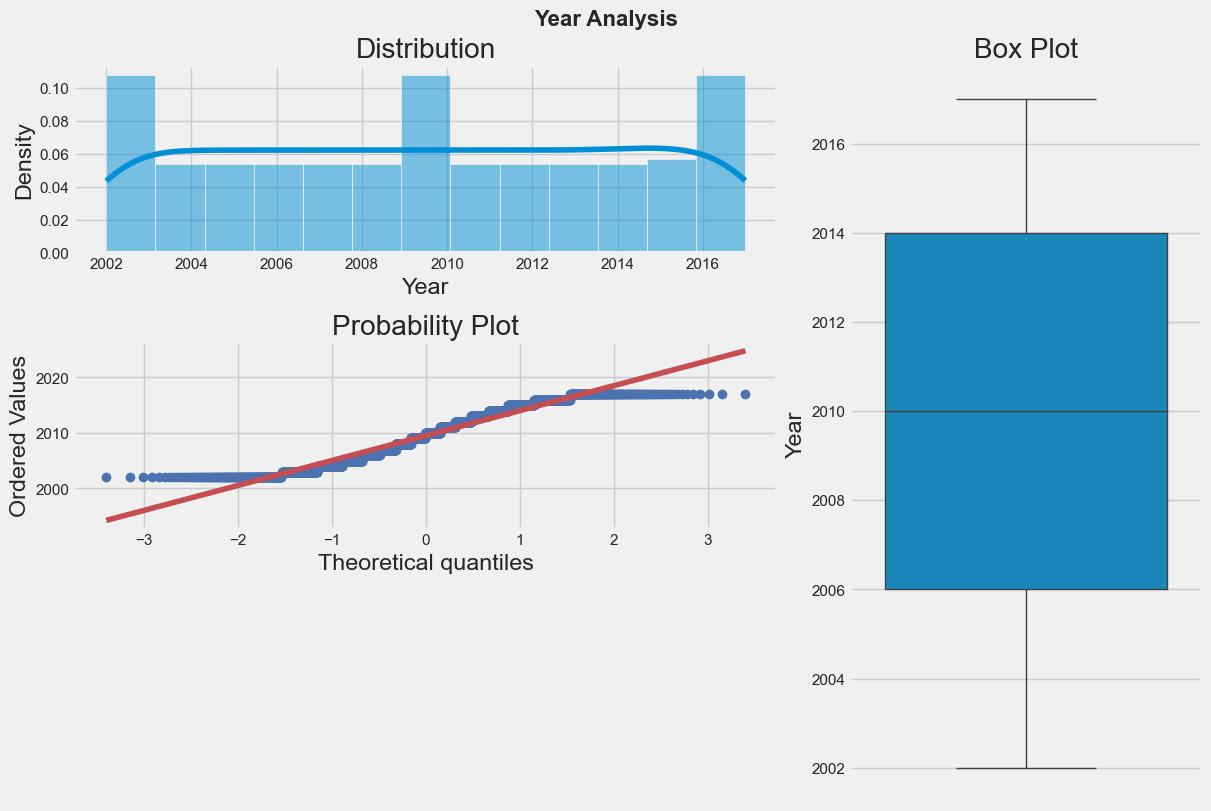

In [24]:
plotting_3_chart(df, 'Year', 'Year Analysis')

# Observation 3: Status

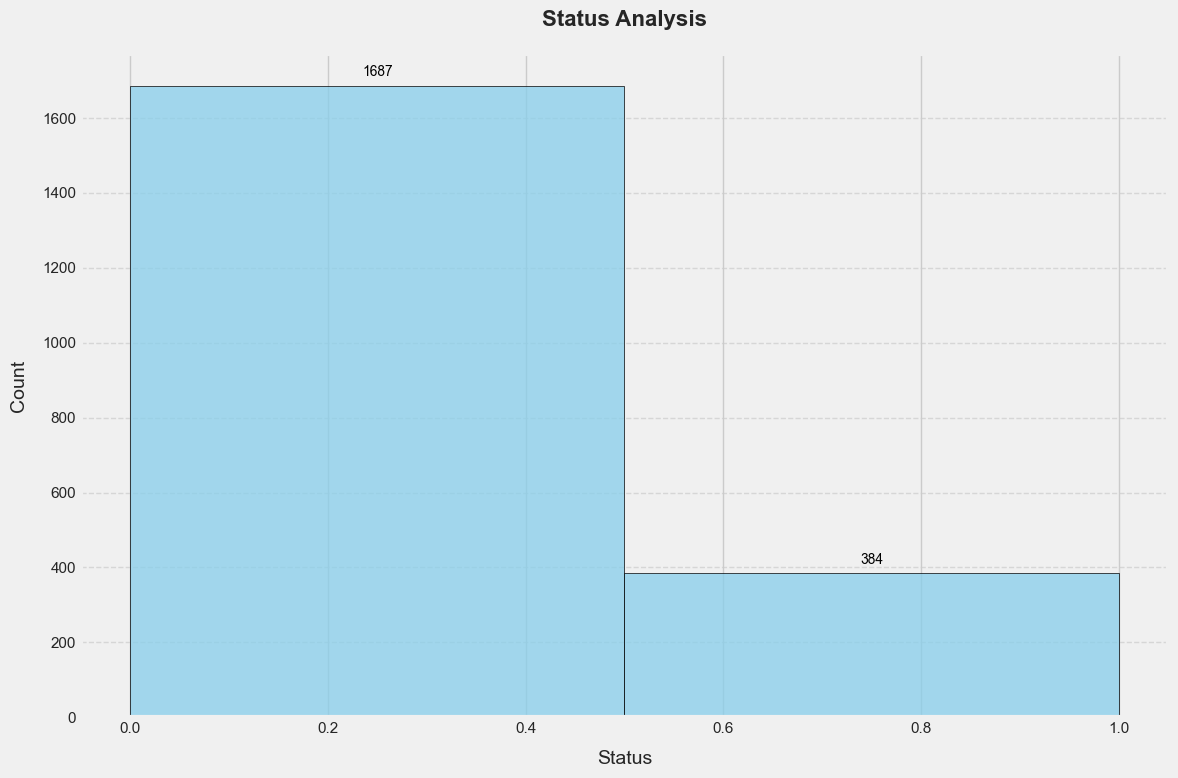

In [27]:
customized_displot(df['Status'], 'Status Analysis')


# Observation 4: Adult Mortality

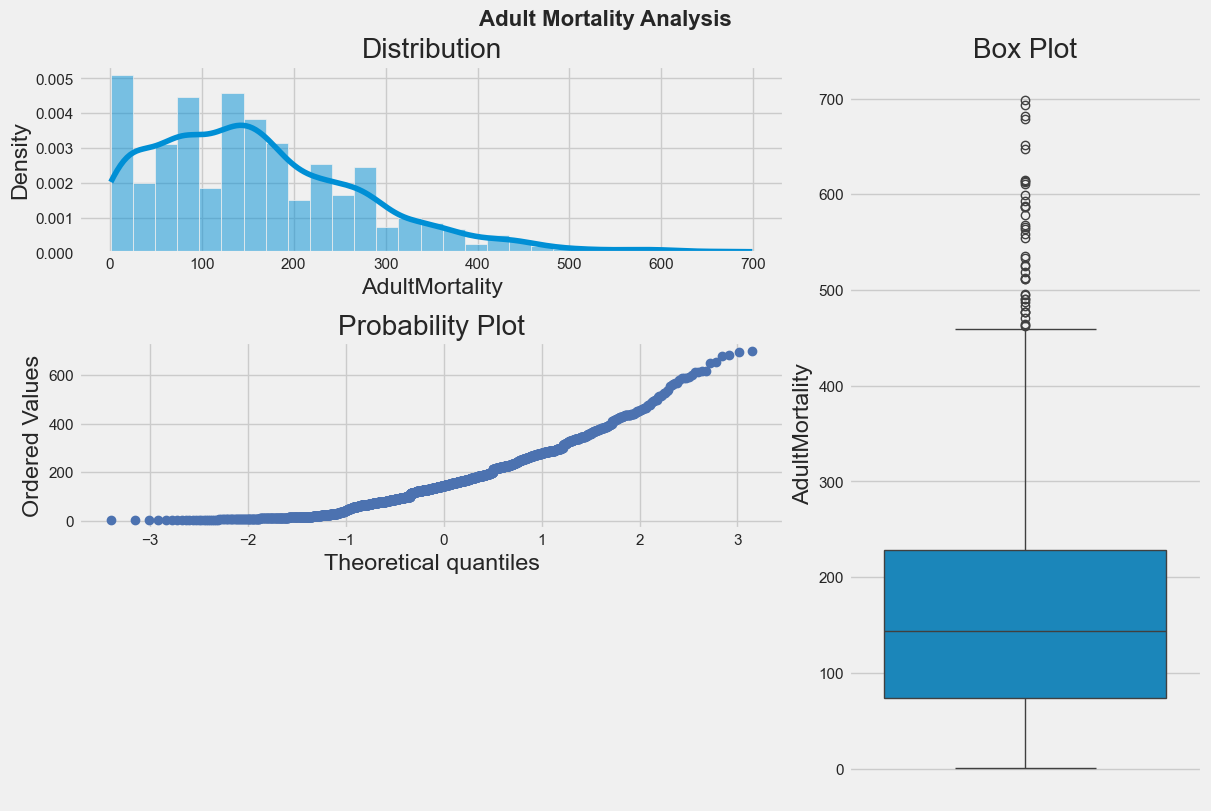

In [32]:
plotting_3_chart(df, 'AdultMortality', 'Adult Mortality Analysis')

# Observation 5: AdultMortality-Male

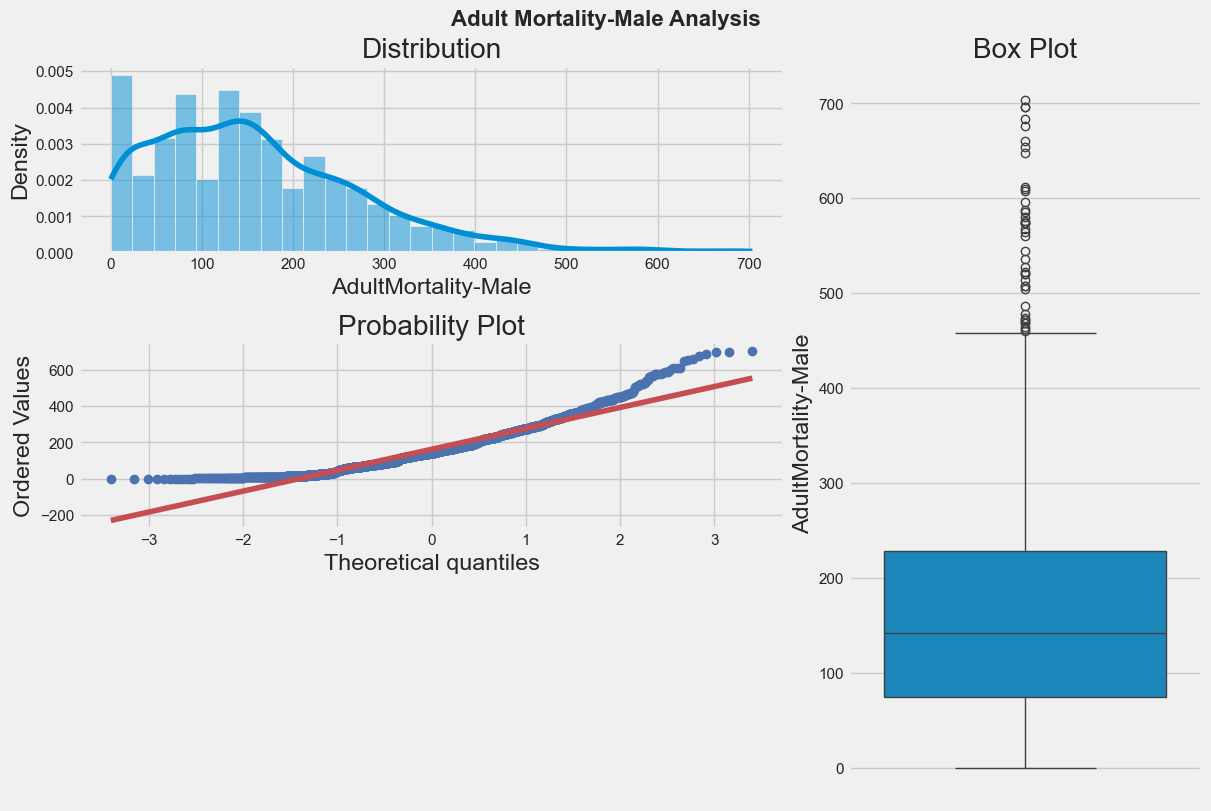

In [31]:
plotting_3_chart(df, 'AdultMortality-Male', 'Adult Mortality-Male Analysis')


In [33]:
def plot_all_features(df, target_col='TARGET_LifeExpectancy', figsize=(12, 6)):
    """
    Plot appropriate visualizations for each feature in the dataframe
    
    Parameters:
    -----------
    df : pandas DataFrame
        The dataset to analyze
    target_col : str
        The target variable column name
    figsize : tuple
        Size of the figure for plots
    """
    
    # Get list of all columns excluding the target
    features = [col for col in df.columns if col != target_col]
    
    for feature in features:
        # Check if column is numeric or categorical
        if df[feature].dtype in ['int64', 'float64']:
            # Numeric feature
            
            # Create a figure with 2 subplots
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
            
            # Plot 1: Distribution of the feature
            sns.histplot(df[feature].dropna(), kde=True, ax=ax1)
            ax1.set_title(f'Distribution of {feature}')
            ax1.set_xlabel(feature)
            
            # Plot 2: Relationship with target variable
            sns.scatterplot(x=feature, y=target_col, data=df, alpha=0.6, ax=ax2)
            ax2.set_title(f'{feature} vs {target_col}')
            ax2.set_xlabel(feature)
            ax2.set_ylabel(target_col)
            
            # Add correlation in the title
            corr = df[[feature, target_col]].corr().iloc[0, 1]
            ax2.set_title(f'{feature} vs {target_col} (corr: {corr:.2f})')
            
            plt.tight_layout()
            plt.show()
            
            # Additional plot for highly correlated features: Regression line
            if abs(corr) > 0.5:
                plt.figure(figsize=(10, 6))
                sns.regplot(x=feature, y=target_col, data=df)
                plt.title(f'Regression: {feature} vs {target_col} (corr: {corr:.2f})')
                plt.tight_layout()
                plt.show()
                
        else:
            # Categorical feature
            plt.figure(figsize=figsize)
            
            # Create a boxplot to show target distribution by category
            sns.boxplot(x=feature, y=target_col, data=df)
            plt.title(f'{target_col} by {feature}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
            # Count plot for categorical variable
            plt.figure(figsize=(10, 6))
            sns.countplot(x=feature, data=df)
            plt.title(f'Count of observations by {feature}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()


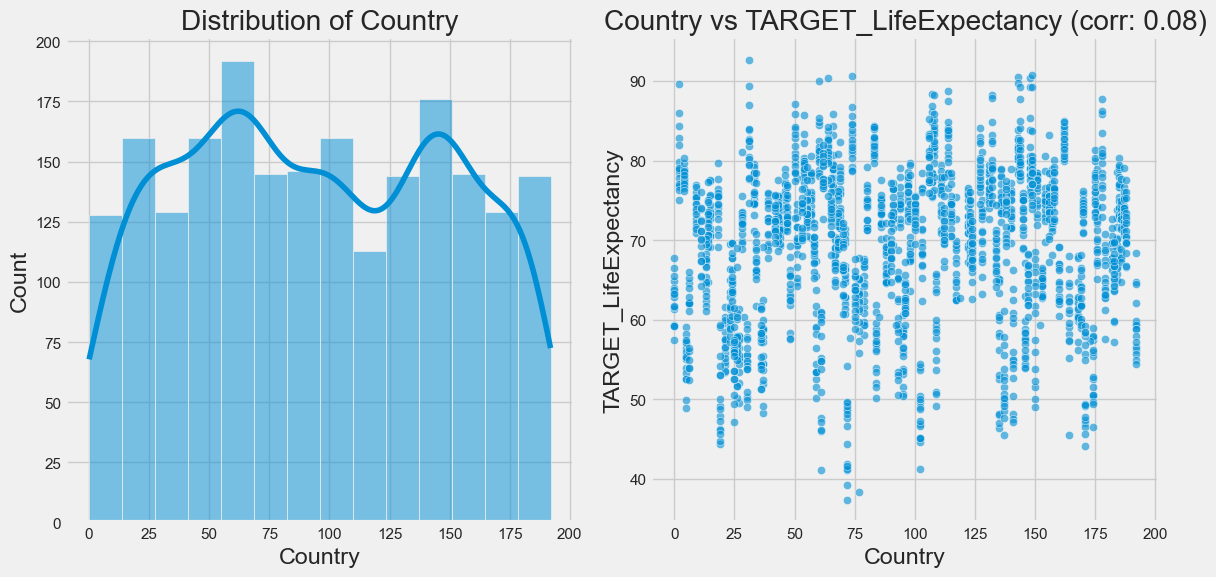

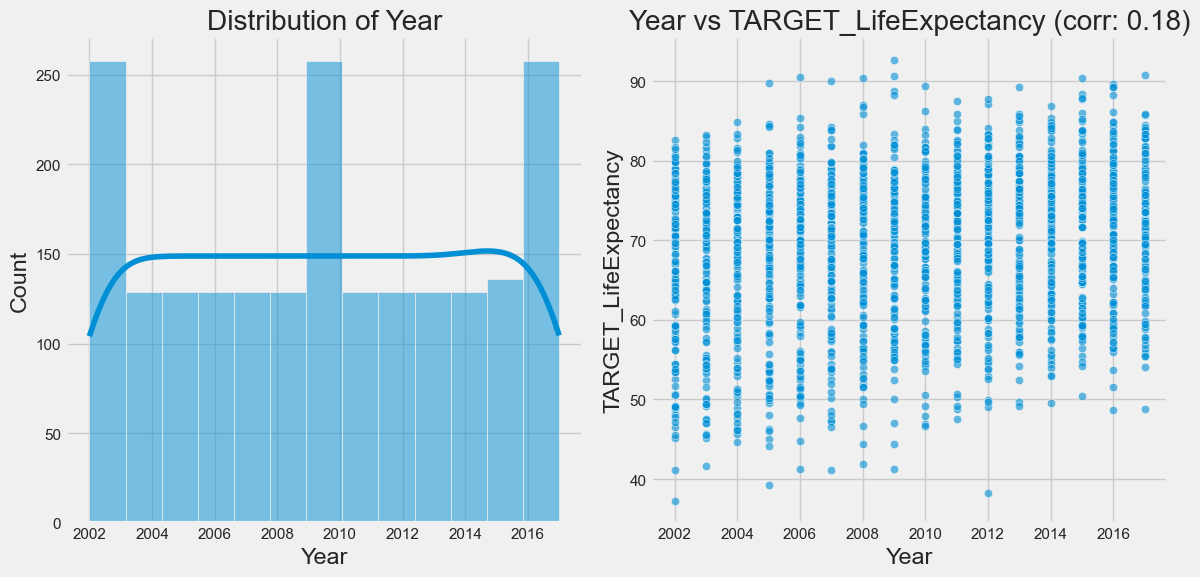

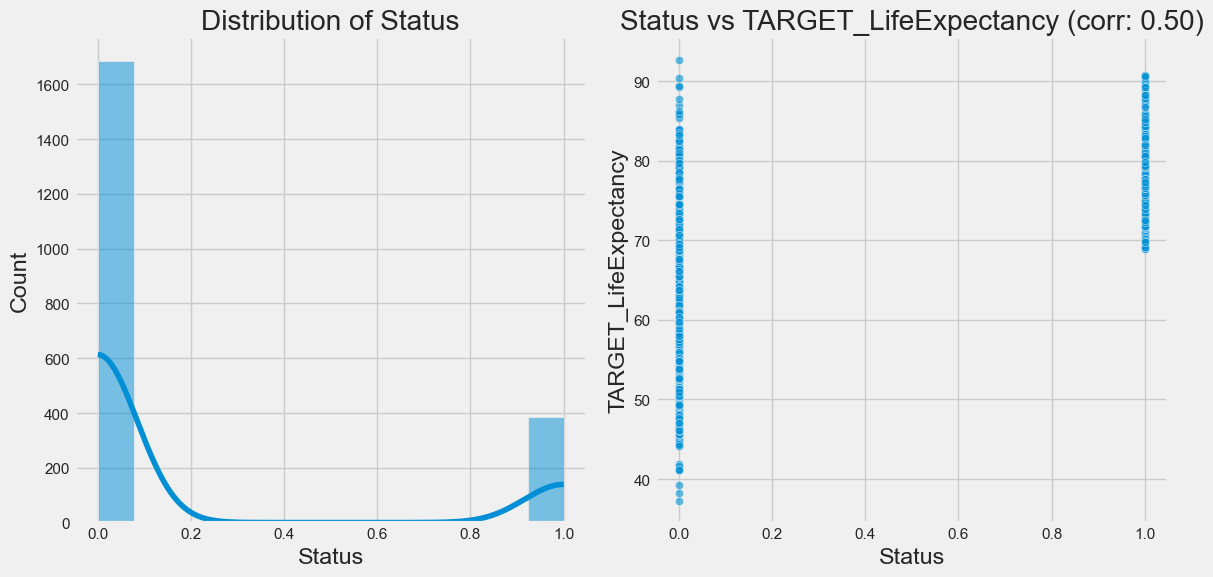

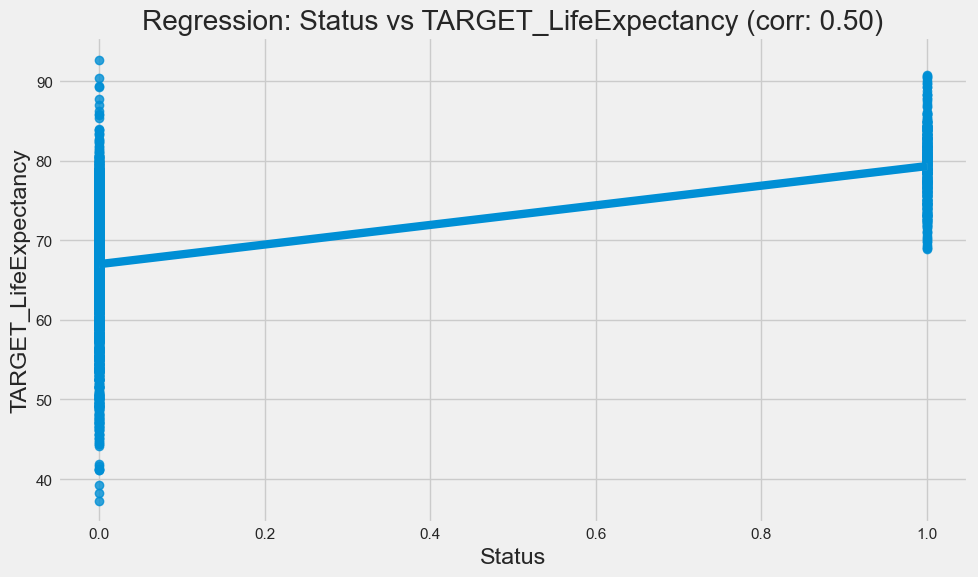

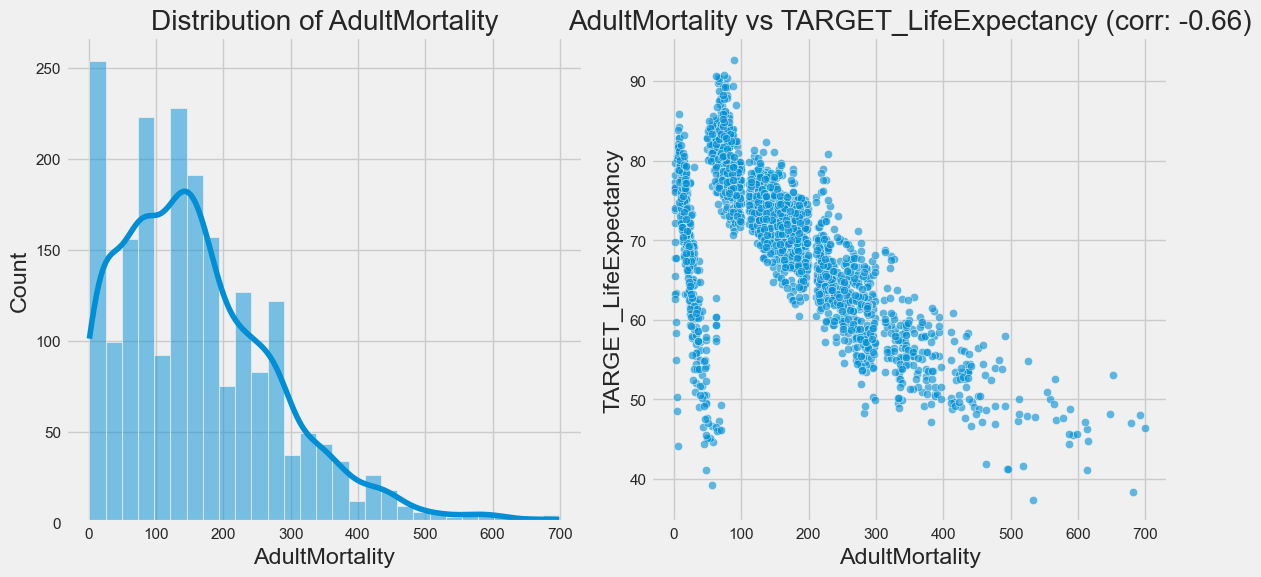

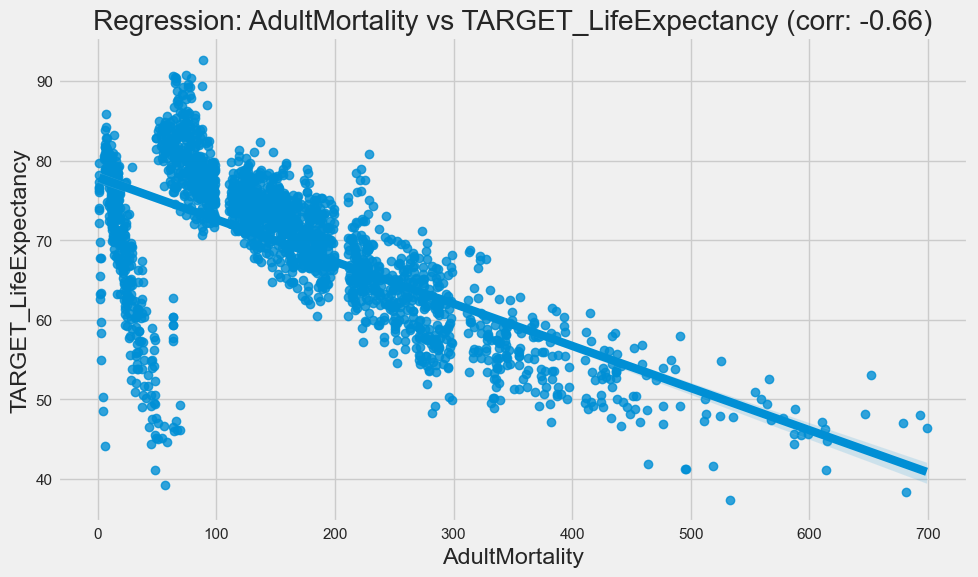

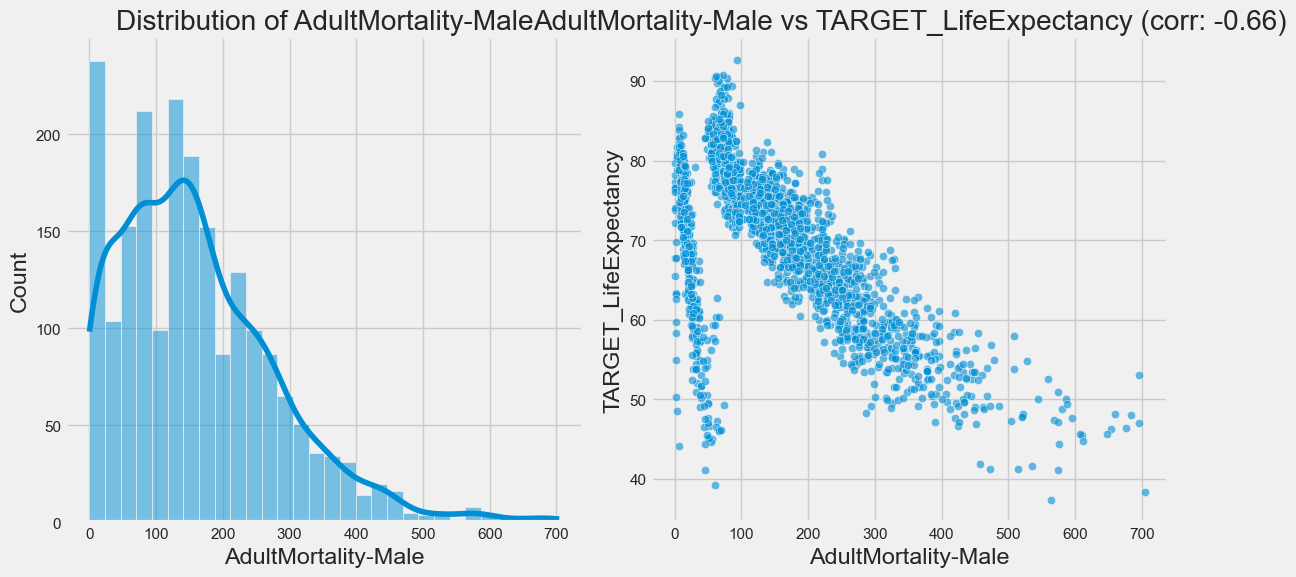

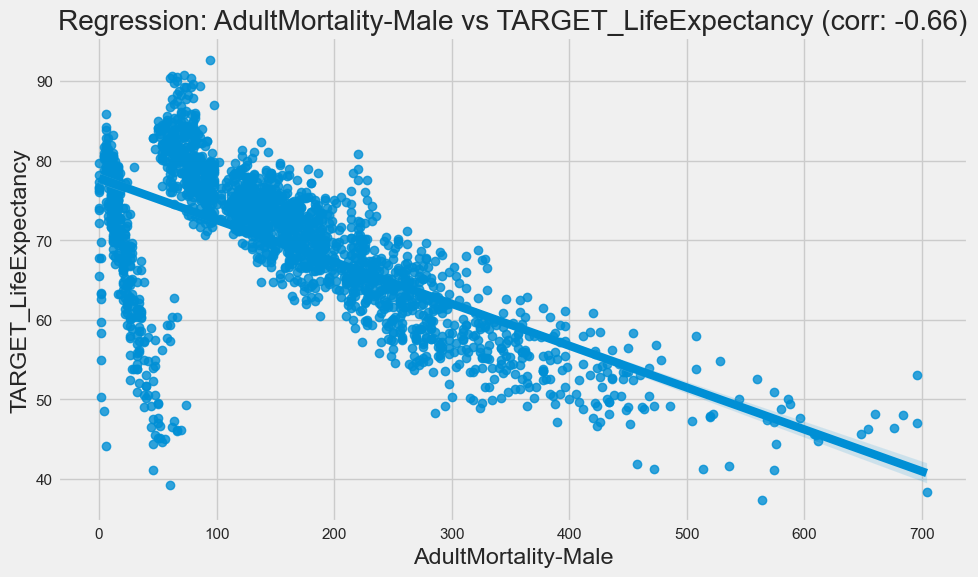

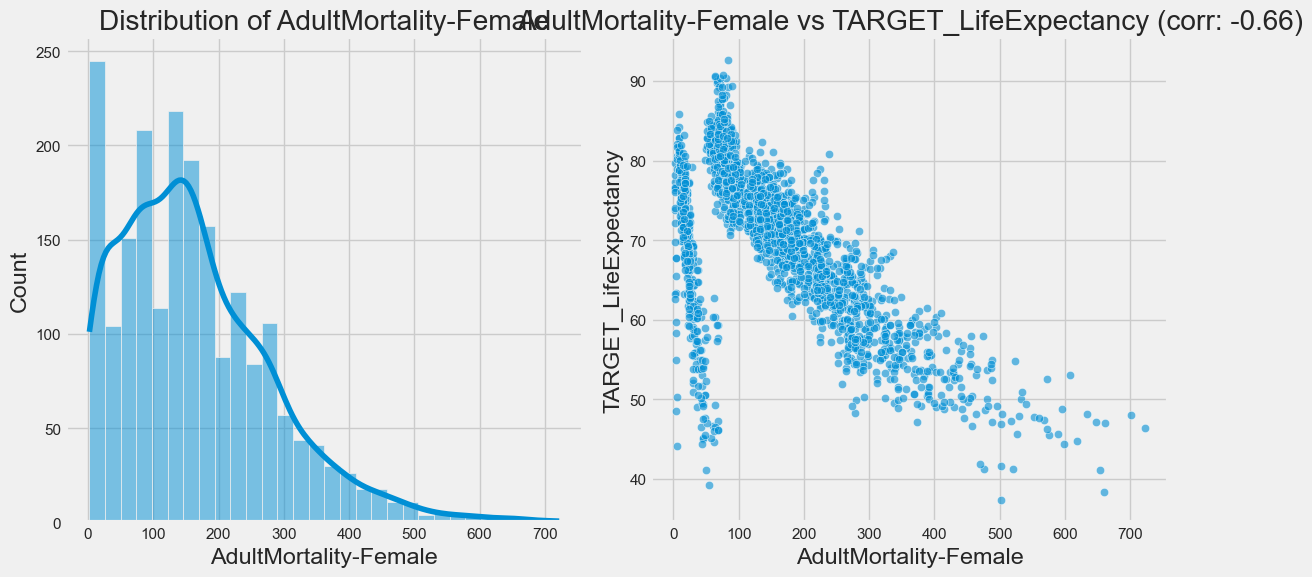

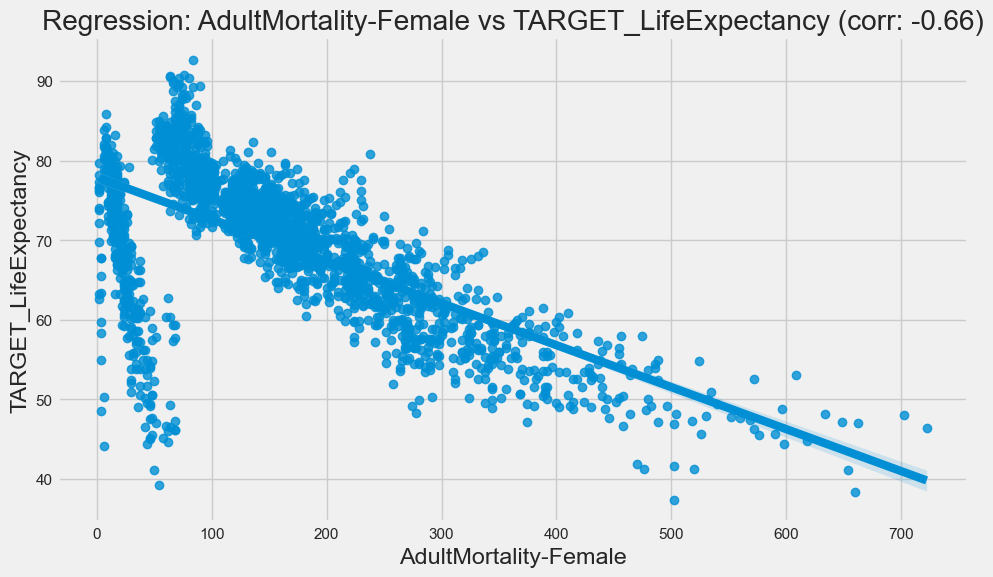

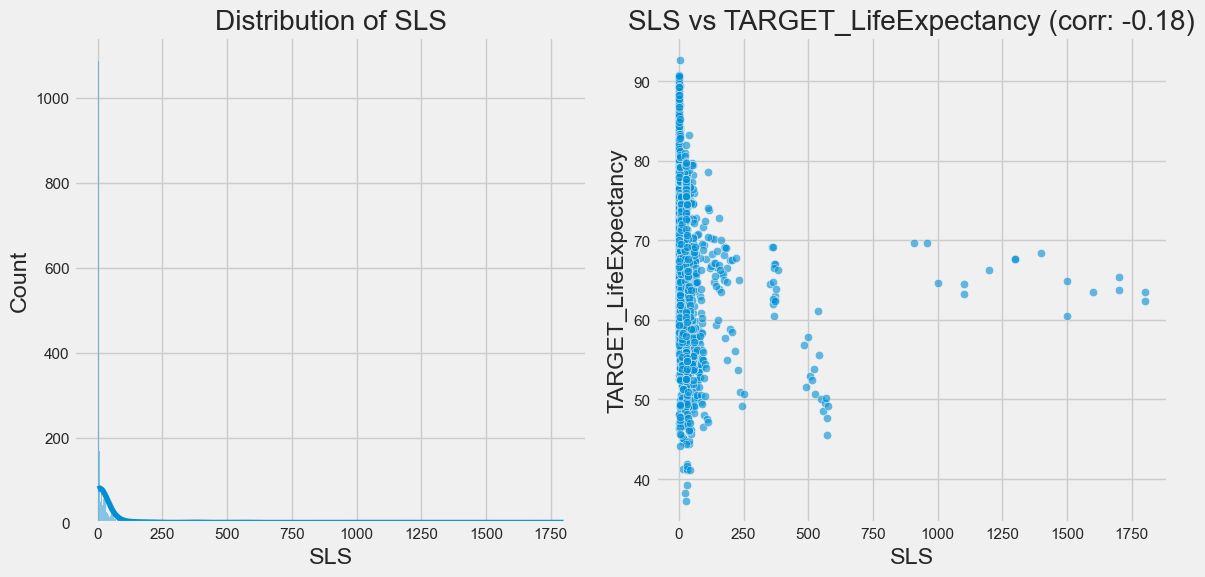

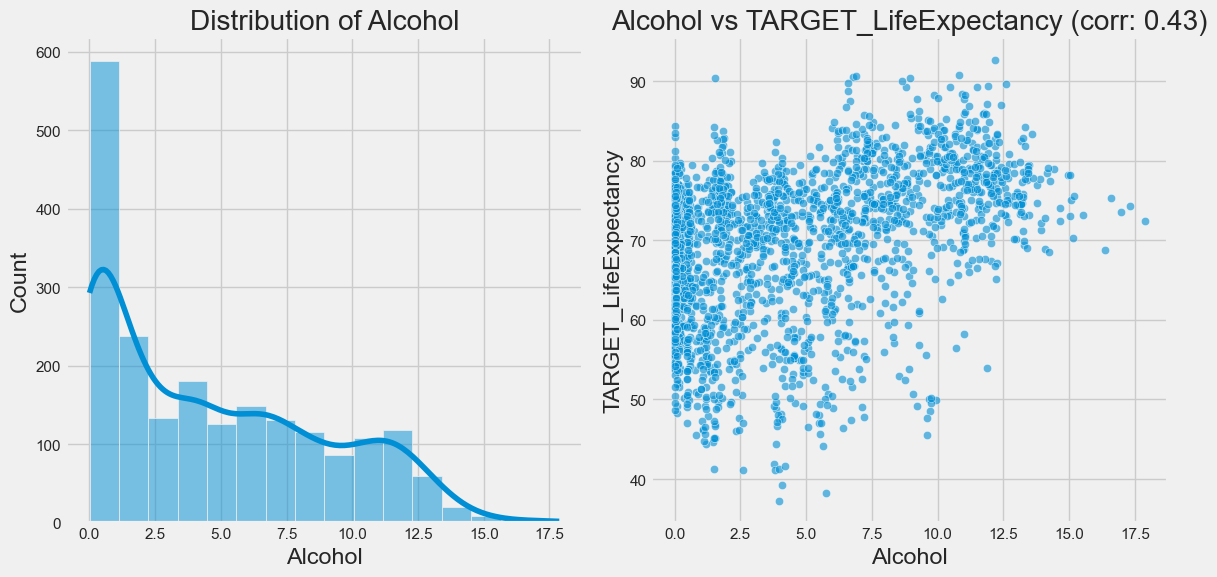

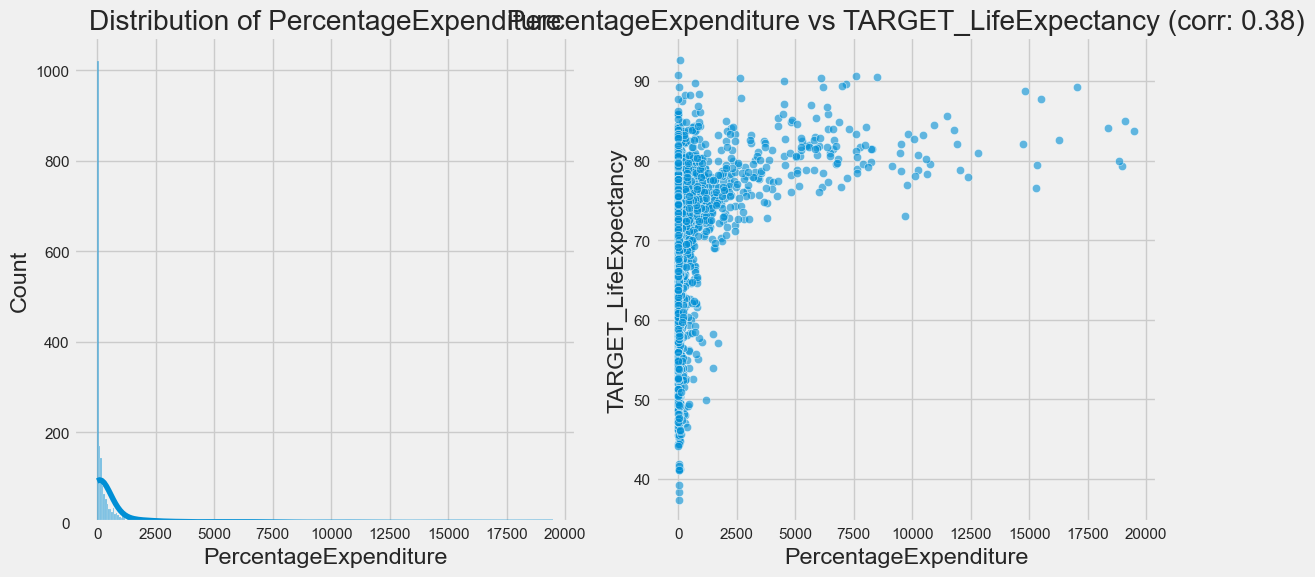

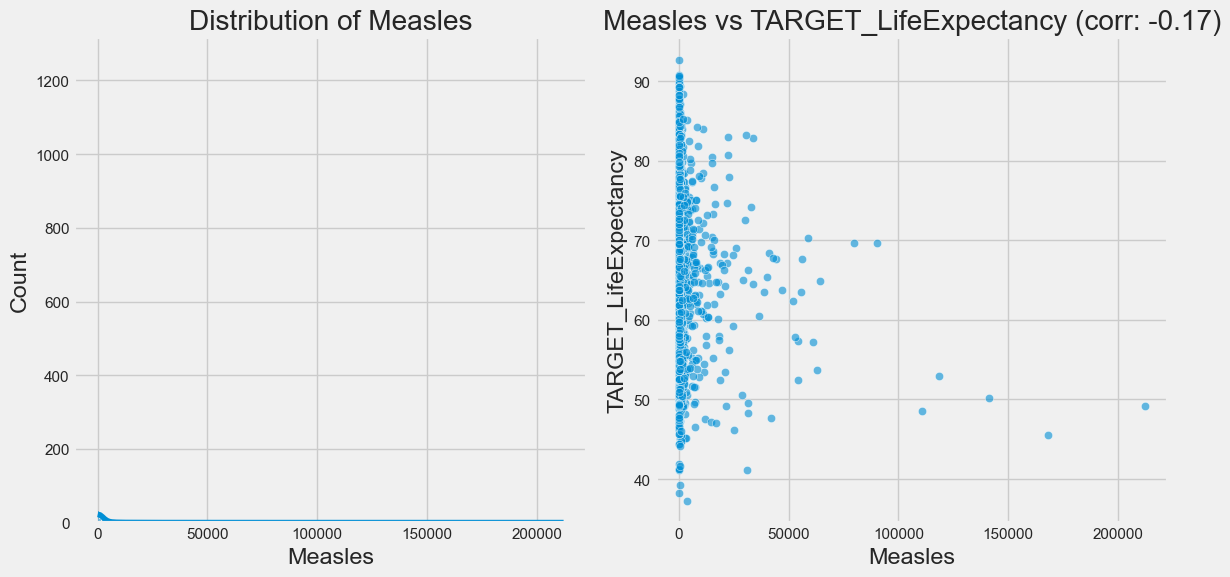

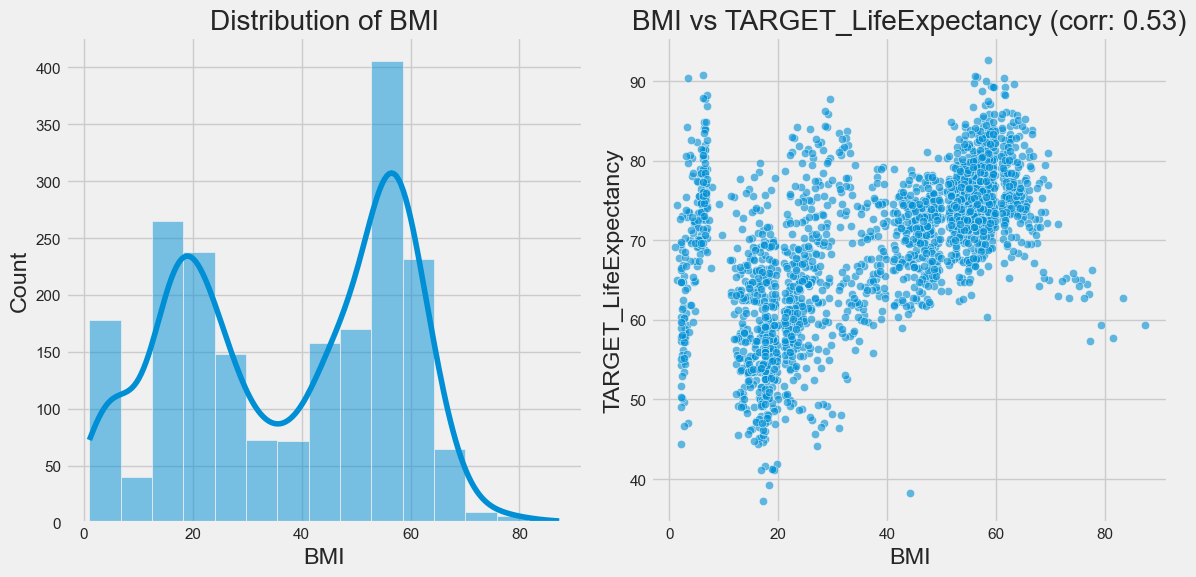

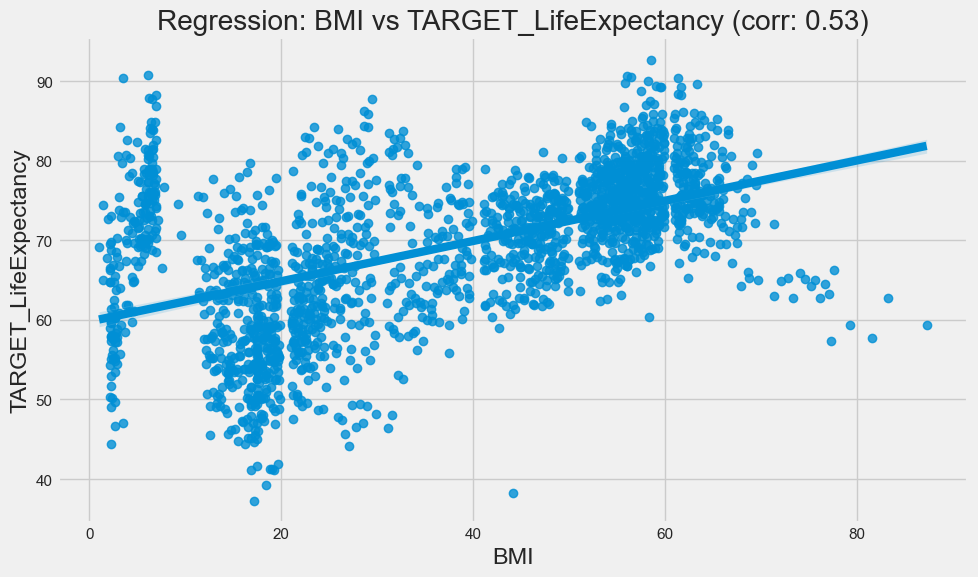

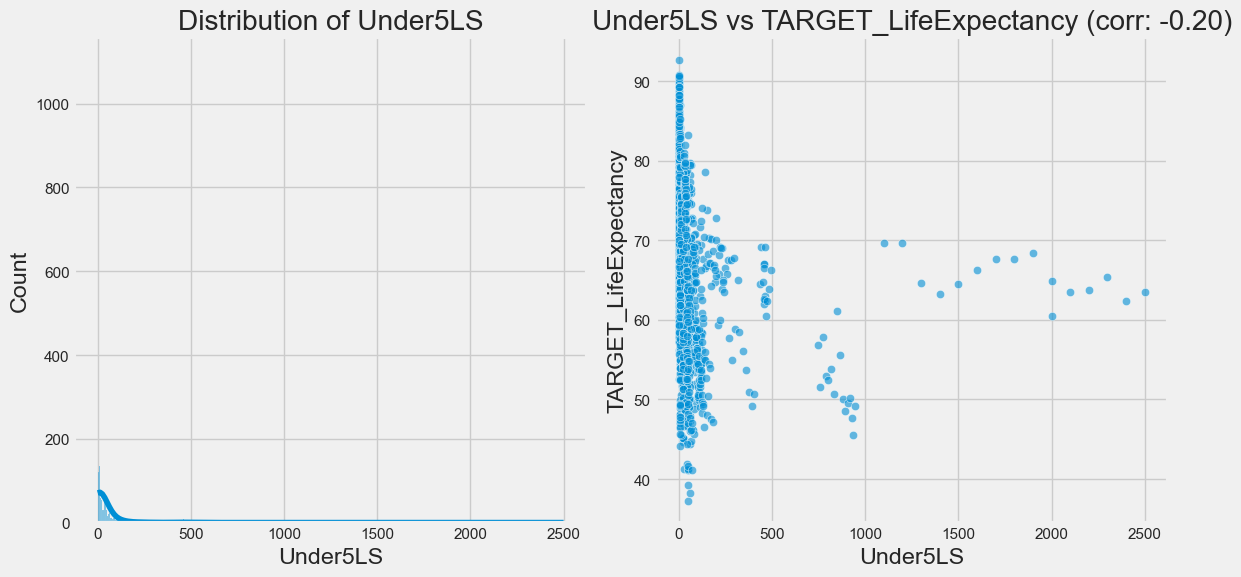

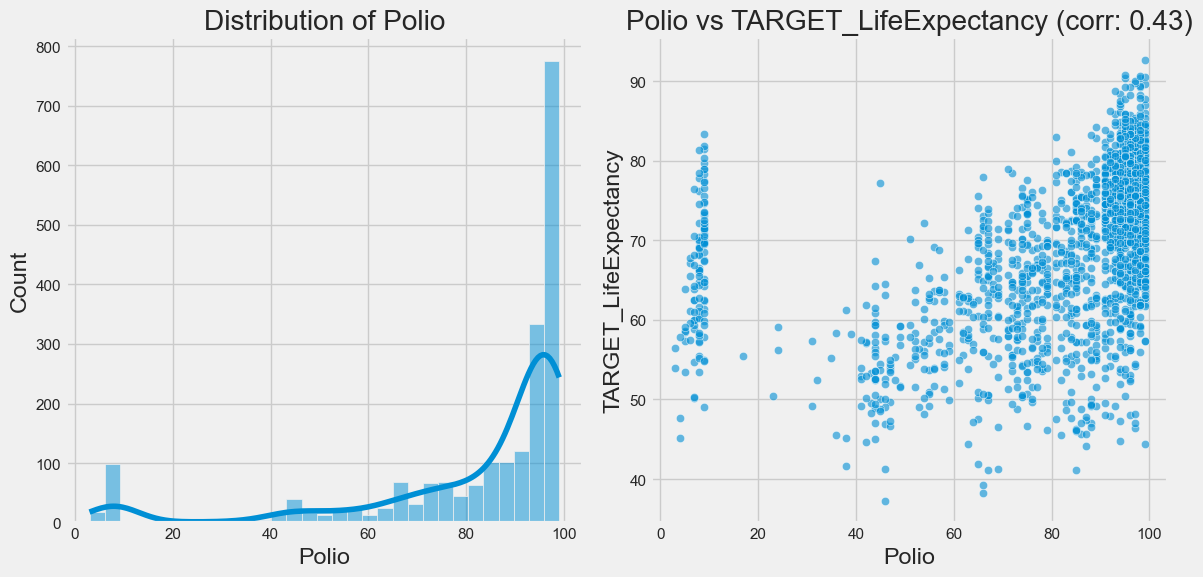

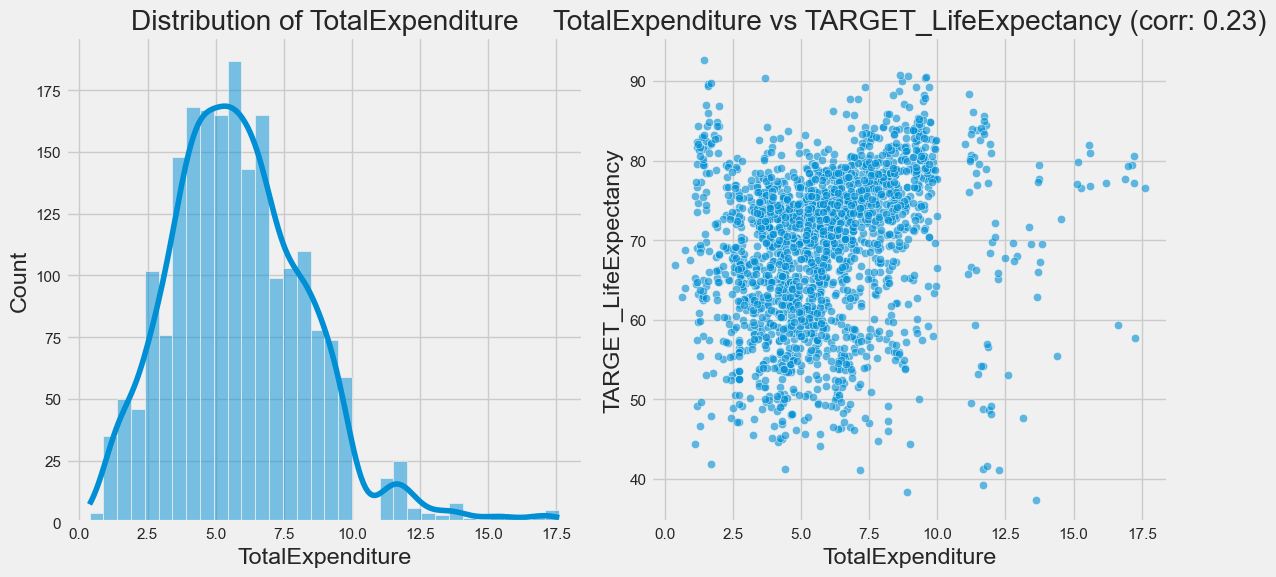

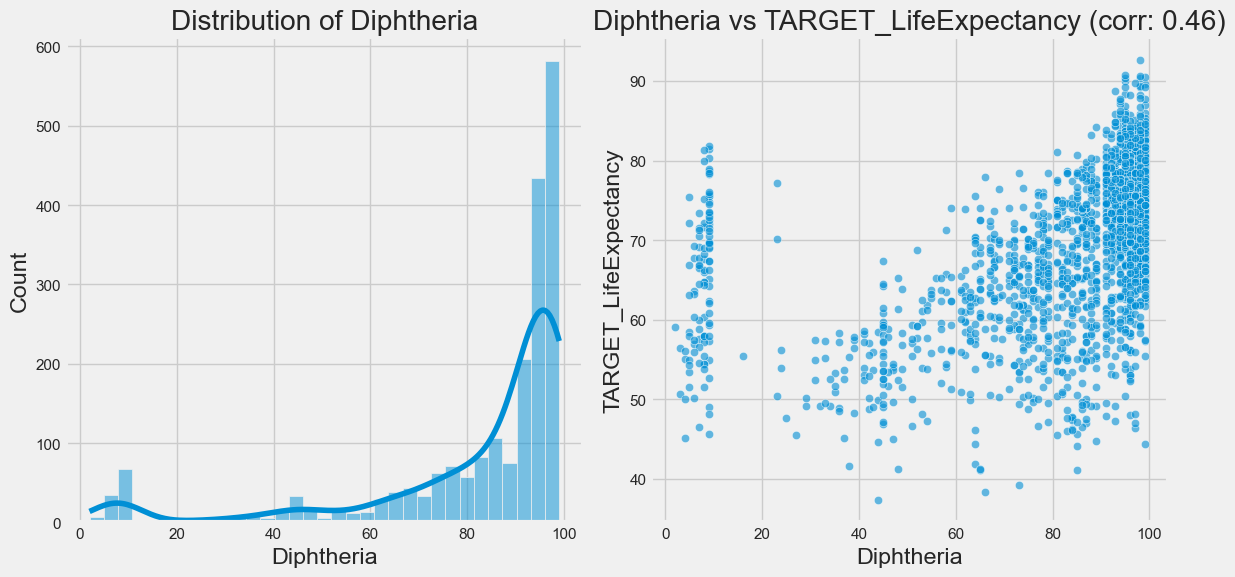

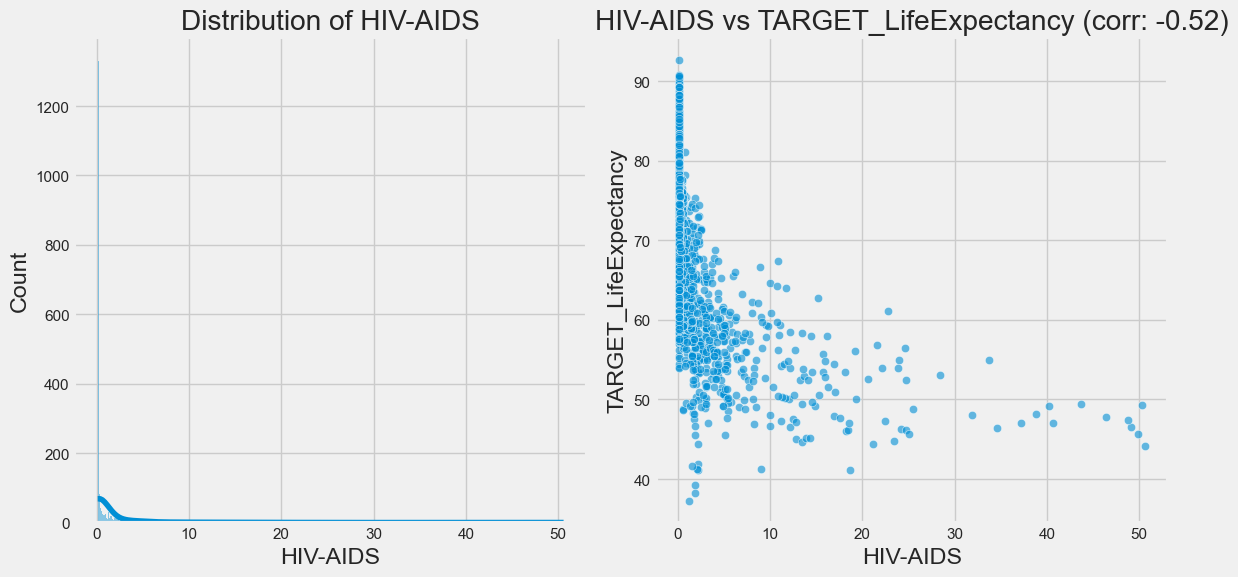

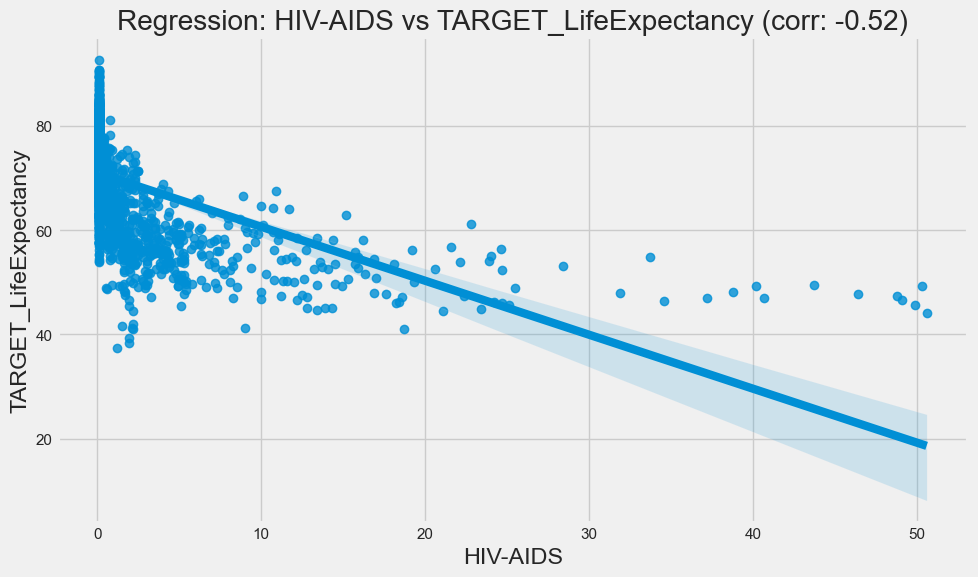

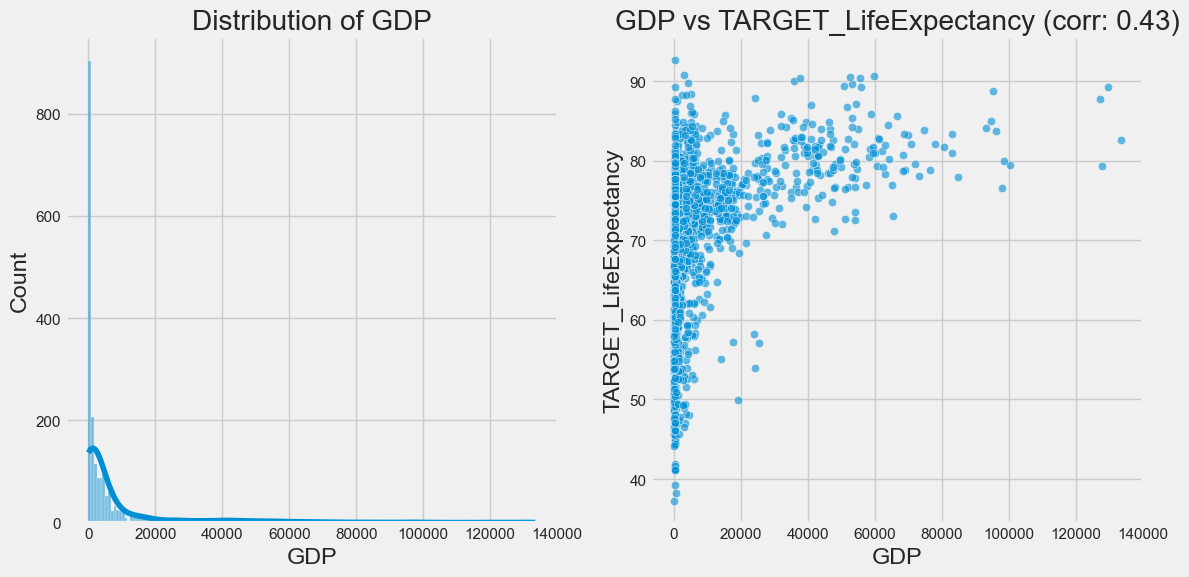

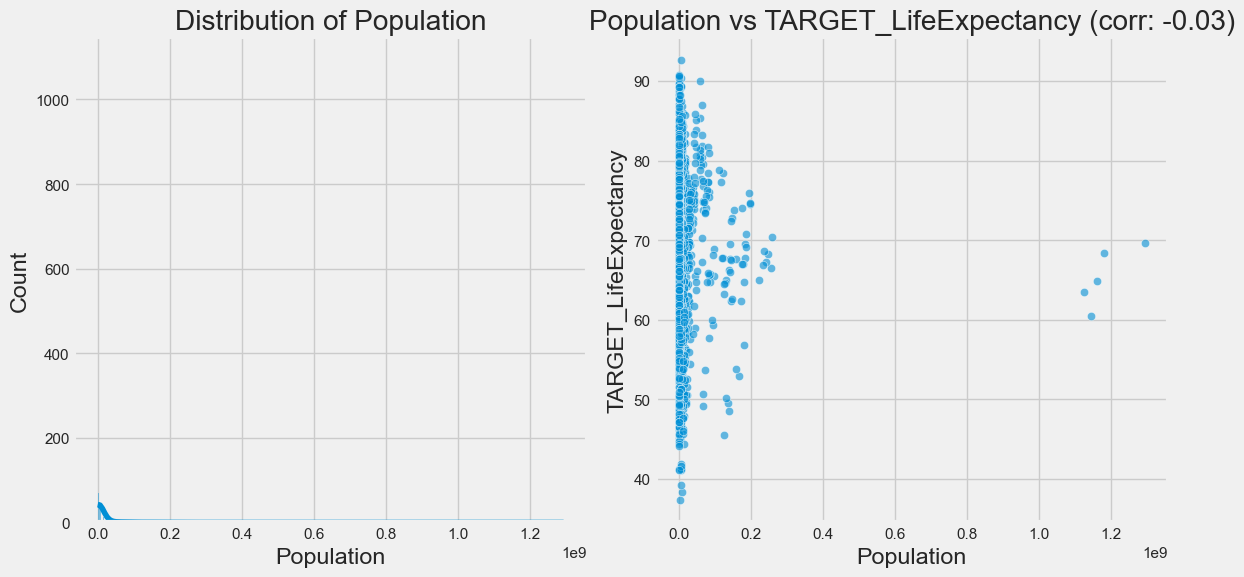

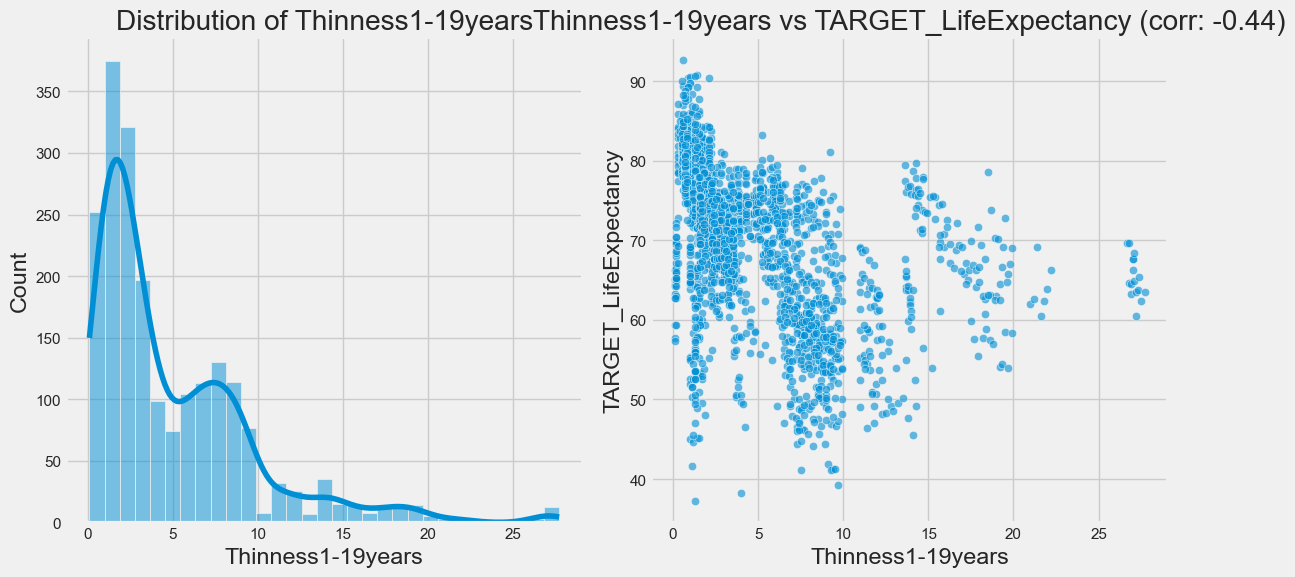

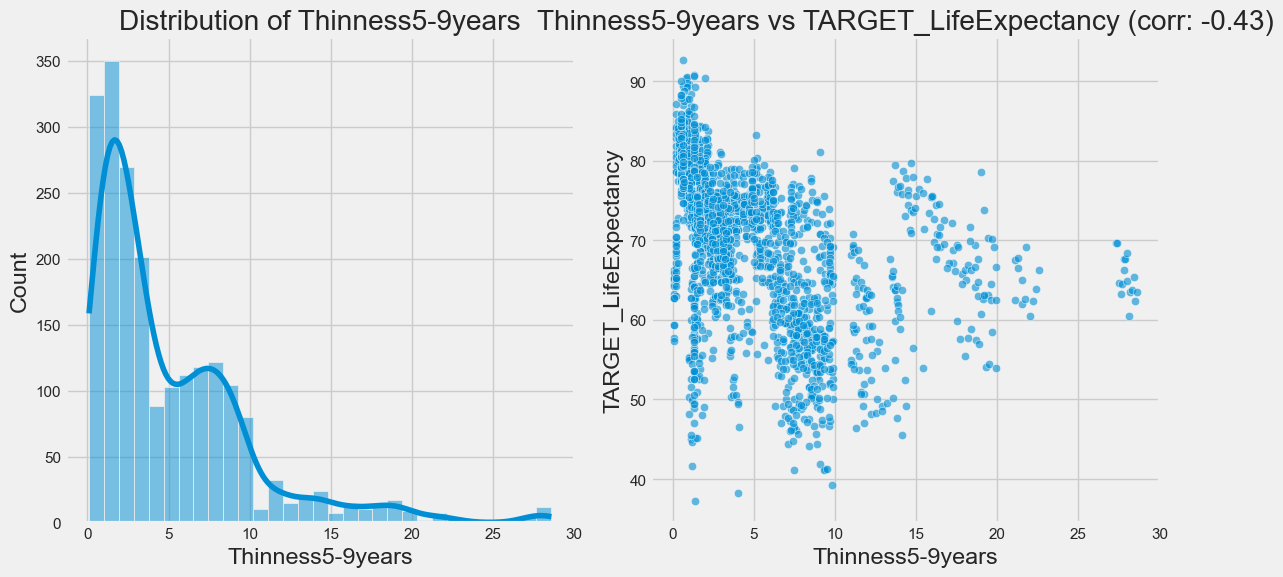

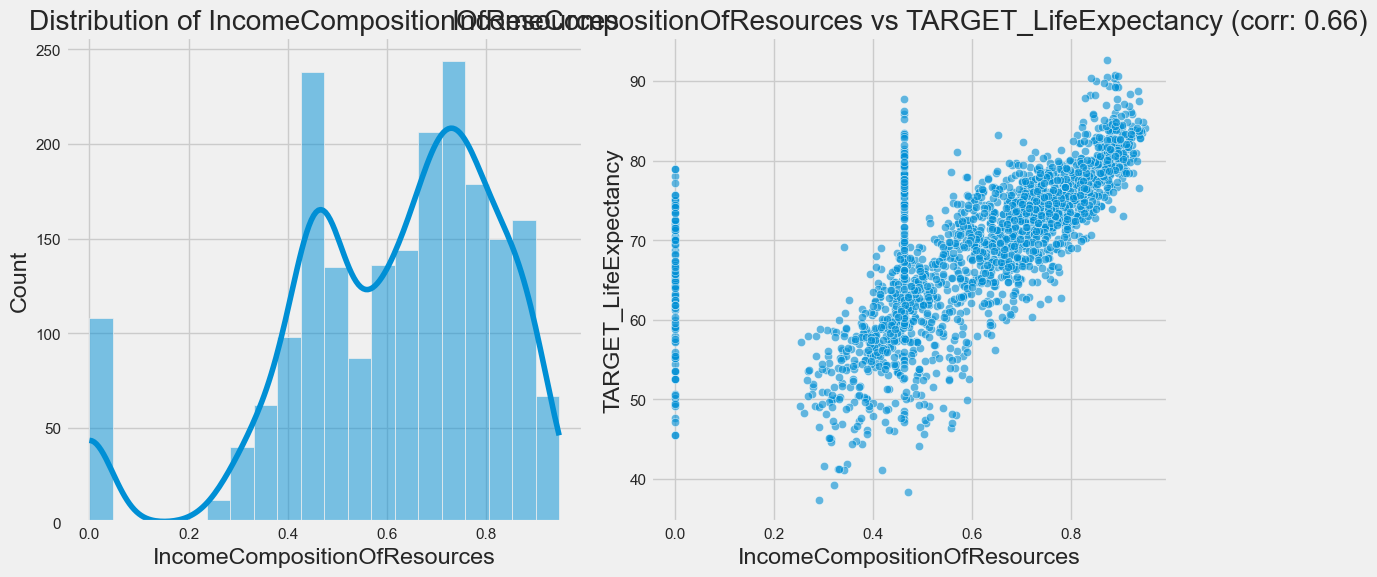

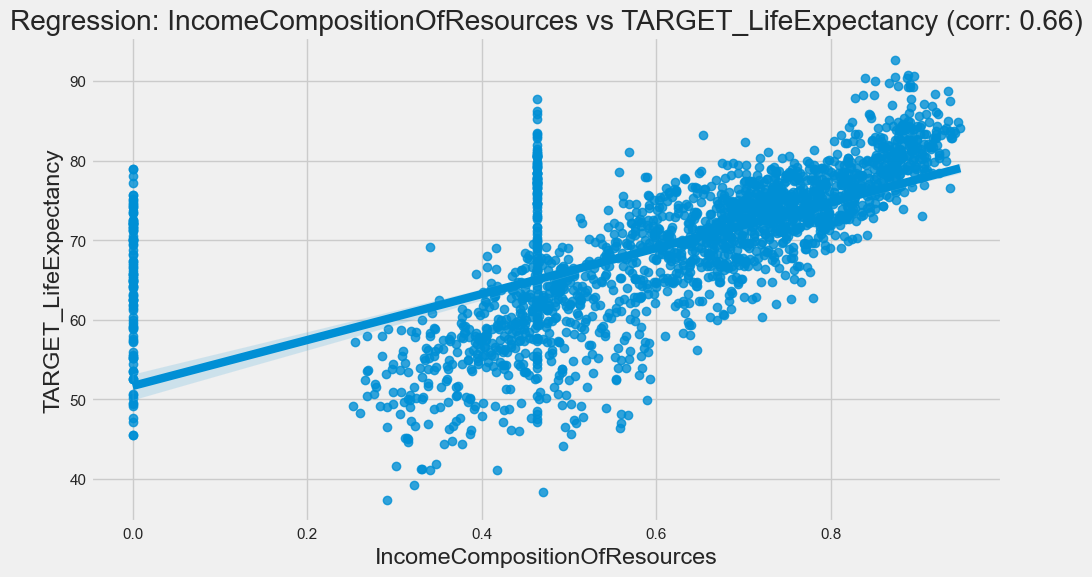

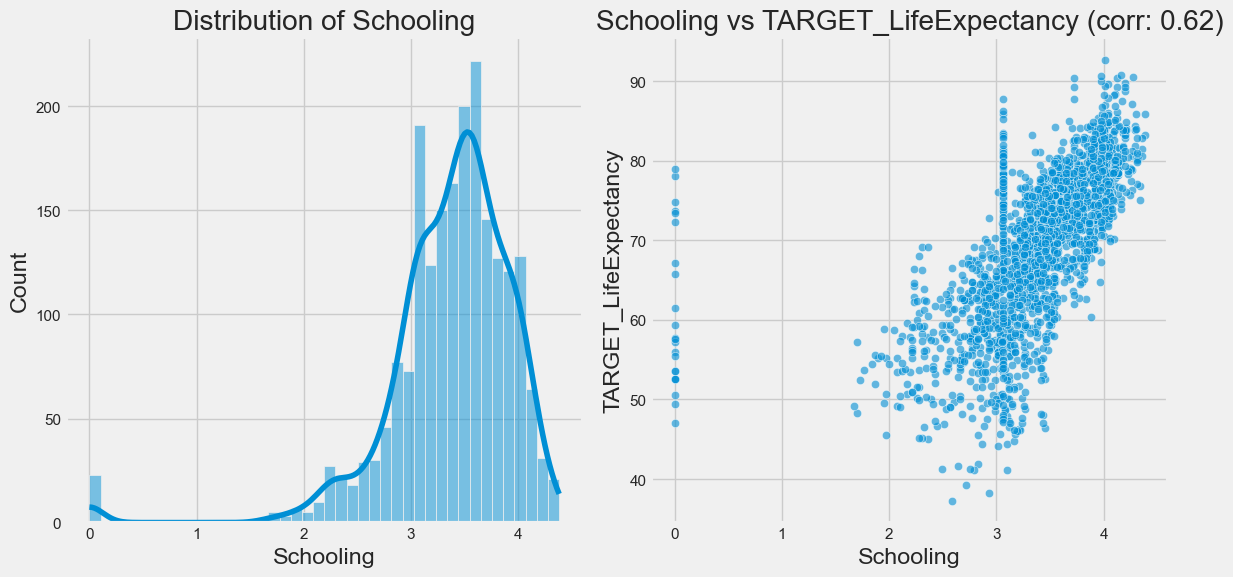

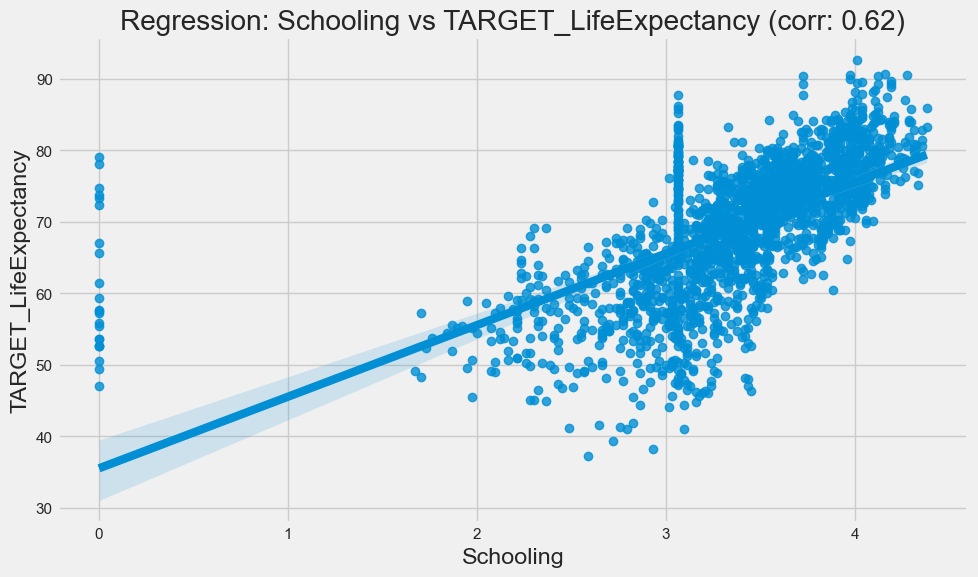

In [34]:
plot_all_features(df)